# 02: Geoprocessing


## imports


In [93]:
import pyogrio as ogr
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap
import pandas as pd
import numpy as np
from shapely import wkt


# done
# spatial join
# buildings to tax lots
# buildings in 3d with lonboard
# dissolve tax lot by lu or by owner

# not done
# union tax lots and sidewalk to get blocks in total
# intersect to show non-building area
# calculate soft site potential based on FAR, lot size, building class

In [2]:
geojson_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/narrative.geojson'
gdf = gpd.read_file(geojson_path)


In [3]:
print(gdf.columns)


Index(['geometry'], dtype='object')


In [4]:
print(gdf.head())


                     geometry
0  POINT (-74.00888 40.73953)
1  POINT (-74.01017 40.74347)
2  POINT (-73.97848 40.75311)
3  POINT (-74.00049 40.75386)
4  POINT (-74.06198 40.73259)


<Axes: >

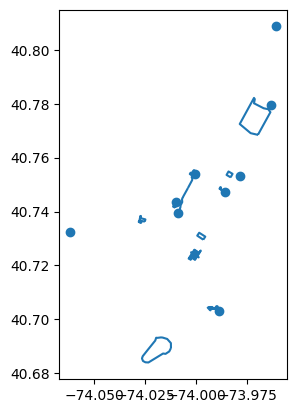

In [5]:
gdf.plot()


In [140]:
geojson_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Points Of Interest.geojson'
gdf = gpd.read_file(geojson_path)

In [141]:
gdf.columns


Index(['name', 'source', 'complexid', 'saftype', 'pri_add', 'modified',
       'faci_dom', 'facility_t', 'b7_sc', 'placeid', 'bin', 'sos', 'segmentid',
       'borough', 'created', 'geometry'],
      dtype='object')

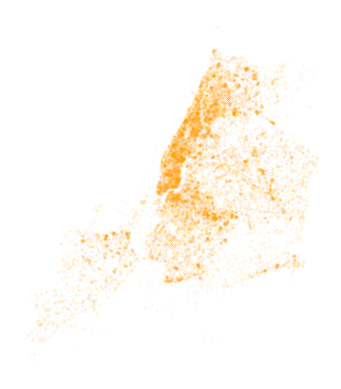

In [81]:
ax = gdf2.plot(marker='o', color='orange', markersize=0.01, alpha=0.5)
ax.set_axis_off()

In [142]:
gdf2.columns = gdf2.columns.str.strip()

C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1915987321.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultural_facilities.loc[:, 'Category'] = cultural_facilities['SOS'].map(cultural_facility_mapping)
C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1915987321.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recreational_facilities.loc[:, 'Category'] = recreational_facilities['SOS'].map(recreational_facility_mapping)


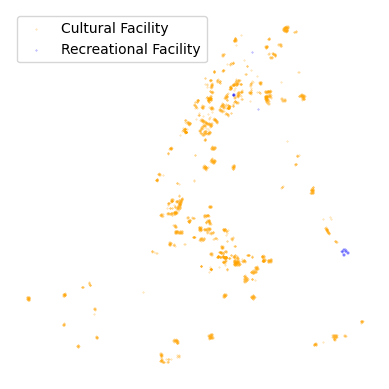

In [137]:
# Load the CSV file
file_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Point_Of_Interest.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Define the category mappings
cultural_facility_mapping = {
    1: 'Center',
    2: 'Library',
    3: 'Theater/Concert Hall',
    4: 'Museum',
    5: 'Other'
}

recreational_facility_mapping = {
    1: 'Park',
    2: 'Amusement Park',
    3: 'Golf Course',
    4: 'Beach',
    5: 'Botanical Garden',
    6: 'Zoo',
    7: 'Recreational Center',
    8: 'Sports',
    9: 'Playground',
    10: 'Other',
    11: 'Pool',
    12: 'Garden'
}

cultural_facilities = df[(df['FACI_DOM'] == 3) & (df['FACILITY_T'] == 1)]
cultural_facilities.loc[:, 'Category'] = cultural_facilities['SOS'].map(cultural_facility_mapping)

# Filter recreational facilities
recreational_facilities = df[(df['FACI_DOM'] == 4) & (df['FACILITY_T'] == 1)]
recreational_facilities.loc[:, 'Category'] = recreational_facilities['SOS'].map(recreational_facility_mapping)

# Combine the filtered data
combined_facilities = pd.concat([cultural_facilities, recreational_facilities])
# Convert 'the_geom' to geometric data
combined_facilities['geometry'] = combined_facilities['the_geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(combined_facilities, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=4456)

# Plot the points on a map
fig, ax = plt.subplots()

cultural_gdf = gdf[gdf['FACI_DOM'] == 3]
recreational_gdf = gdf[gdf['FACI_DOM'] == 4]

cultural_gdf.plot(ax=ax, marker='o', color='orange', markersize=0.1, alpha=0.5, label='Cultural Facility')
recreational_gdf.plot(ax=ax, marker='o', color='blue', markersize=0.1, alpha=0.5, label='Recreational Facility')

ax.set_axis_off()
plt.legend()
plt.show()

C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1247004360.py:58: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  transportation_gdf.plot(ax=ax, marker='o', color='green', markersize=0.01, alpha=0.5, label='Transportation Facility')
C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1247004360.py:59: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  water_gdf.plot(ax=ax, marker='o', color='cyan', markersize=0.01, alpha=0.5, label='Water Facility')
C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1247004360.py:60: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  miscellaneous_gdf.plot(ax=ax, marker='o', color='magenta', markersize=0.01, alpha=0.5, label='Miscellaneous Facility')
C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\1247004360.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with a

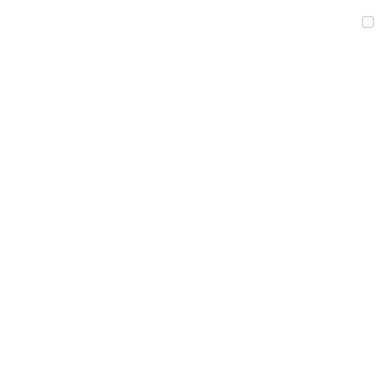

In [157]:
file_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Point_Of_Interest.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

transportation_facility_mapping = {
    6: 'Marina',
    7: 'Pier',
    8: 'Bridge'
}

water_mapping = {
    1: 'Island',
    2: 'River',
    3: 'Lake',
    4: 'Stream',
    5: 'Other',
    6: 'Pond'
}

miscellaneous_mapping = {
    1: 'Official Landmark',
    2: 'Point of Interest',
    3: 'Cemetery/Morgue',
    4: 'Other'
}


# Filter transportation facilities
transportation_facilities = df[(df['FACI_DOM'] == 6) & (df['FACILITY_T'] == 1)]
transportation_facilities.loc[:, 'Category'] = transportation_facilities['SOS'].map(transportation_facility_mapping)

# Filter water facilities
water_facilities = df[(df['FACI_DOM'] == 12) & (df['FACILITY_T'] == 1)]
water_facilities.loc[:, 'Category'] = water_facilities['SOS'].map(water_mapping)

# Filter miscellaneous facilities
miscellaneous_facilities = df[(df['FACI_DOM'] == 13) & (df['FACILITY_T'] == 1)]
miscellaneous_facilities.loc[:, 'Category'] = miscellaneous_facilities['SOS'].map(miscellaneous_mapping)

# Combine the filtered data
combined_facilities = pd.concat([transportation_facilities, water_facilities, miscellaneous_facilities])

# Convert 'the_geom' to geometric data
combined_facilities['geometry'] = combined_facilities['the_geom'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(combined_facilities, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)
gdf = gdf.to_crs(epsg=4456)

# Plot the points on a map
fig, ax = plt.subplots()


transportation_gdf = gdf[gdf['FACI_DOM'] == 6]
water_gdf = gdf[gdf['FACI_DOM'] == 12]
miscellaneous_gdf = gdf[gdf['FACI_DOM'] == 13]

transportation_gdf.plot(ax=ax, marker='o', color='green', markersize=0.01, alpha=0.5, label='Transportation Facility')
water_gdf.plot(ax=ax, marker='o', color='cyan', markersize=0.01, alpha=0.5, label='Water Facility')
miscellaneous_gdf.plot(ax=ax, marker='o', color='magenta', markersize=0.01, alpha=0.5, label='Miscellaneous Facility')

if not transportation_gdf.empty:
    transportation_gdf.plot(ax=ax, marker='o', color='green', markersize=0.01, alpha=0.5, label='Transportation Facility')
if not water_gdf.empty:
    water_gdf.plot(ax=ax, marker='o', color='cyan', markersize=0.01, alpha=0.5, label='Water Facility')
if not miscellaneous_gdf.empty:
    miscellaneous_gdf.plot(ax=ax, marker='o', color='magenta', markersize=0.01, alpha=0.5, label='Miscellaneous Facility')

ax.set_axis_off()
plt.legend()
plt.show()

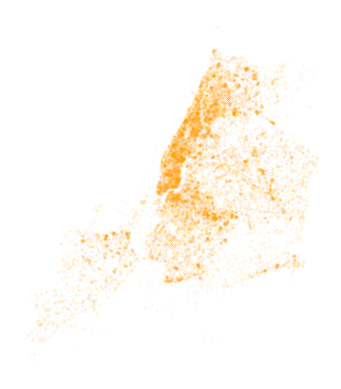

In [11]:
ax = gdf.plot(marker='o', color='orange', markersize=0.01, alpha=0.5)
ax.set_axis_off()


In [122]:
from shapely.geometry import shape

In [123]:
# Load the bounding area GeoJSON file
bounding_area_gdf = gpd.read_file('C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/bounding2.geojson')
print(bounding_area_gdf)

                                            geometry
0  POLYGON ((-73.98950 40.78022, -73.99406 40.773...


C:\Users\cathe\AppData\Local\Temp\ipykernel_5472\2298725431.py:9: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(ax=ax, column='Category', legend=True, cmap='tab20', markersize=5)


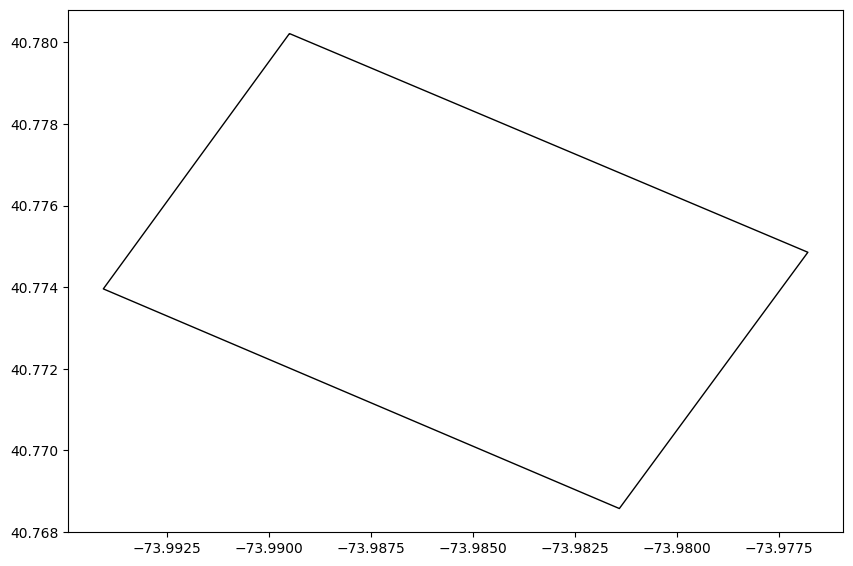

In [124]:
bounding_area = bounding_area_gdf.unary_union

# Filter the main GeoDataFrame to include only data within the bounding area
gdf = gdf[gdf.geometry.within(bounding_area)]

# Plot the points on a map with the bounding area
fig, ax = plt.subplots(figsize=(10, 10))
bounding_area_gdf.boundary.plot(ax=ax, color='black', linewidth=1)
gdf.plot(ax=ax, column='Category', legend=True, cmap='tab20', markersize=5)

ax.set_aspect('equal')  # Ensure the plot is in plan (non-perspective) view
plt.show()

In [109]:
gdf.set_crs(epsg=4326, inplace=True)

,the_geom,SEGMENTID,COMPLEXID,SAFTYPE,SOS,PLACEID,FACI_DOM,BIN,BOROUGH,CREATED,MODIFIED,FACILITY_T,SOURCE,B7SC,PRI_ADD,NAME,Category,geometry
3840,POINT (-73.98591625407487 40.773413129739644),9001933,57,X,1.0,14282,3,1082576,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171104.0,1063576,AMSTERDAM HOUSES BUILDING 3,Center,POINT (-73.98592 40.77341)
4449,POINT (-73.98723988977368 40.77304361655255),291841,57,G,2.0,7731,3,0,1.0,05/14/2009 12:00:00 AM,04/14/2017 12:00:00 AM,1,NYCHA,11171101.0,0,AMSTERDAM HOUSES,Library,POINT (-73.98724 40.77304)
5205,POINT (-73.987383673111 40.773323271870616),9006880,57,X,1.0,14613,3,1082581,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171109.0,1027077,AMSTERDAM HOUSES BUILDING 8,Center,POINT (-73.98738 40.77332)
5938,POINT (-73.9886653747688 40.77331046038148),9002108,57,X,1.0,13038,3,1082585,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171113.0,1027084,AMSTERDAM HOUSES BUILDING 12,Center,POINT (-73.98867 40.77331)
6336,POINT (-73.98650204611104 40.77361908101603),9001951,57,X,1.0,6964,3,1082579,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171107.0,5143724,AMSTERDAM HOUSES BUILDING 6,Center,POINT (-73.98650 40.77362)
6638,POINT (-73.98902073668013 40.77292699432941),9001902,57,X,2.0,7656,3,1082584,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171112.0,1027082,AMSTERDAM HOUSES BUILDING 11,Library,POINT (-73.98902 40.77293)
7199,POINT (-73.98684540086751 40.77211360419272),9001908,57,X,1.0,7121,3,1081771,1.0,05/14/2009 12:00:00 AM,01/31/2013 12:00:00 AM,1,DCP,11171102.0,1063621,AMSTERDAM HOUSES BUILDING 1,Center,POINT (-73.98685 40.77211)
7646,POINT (-73.98816460774663 40.77320063138958),9002110,57,X,1.0,13684,3,1082583,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171110.0,1027081,AMSTERDAM HOUSES BUILDING 9,Center,POINT (-73.98816 40.77320)
9024,POINT (-73.98718595040215 40.77272343089287),9002102,57,X,1.0,7801,3,1082577,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171105.0,1027071,AMSTERDAM HOUSES BUILDING 4,Center,POINT (-73.98719 40.77272)
9743,POINT (-73.98685453479061 40.773124732487574),9008057,57,X,1.0,13546,3,1082578,1.0,05/14/2009 12:00:00 AM,02/01/2013 12:00:00 AM,1,DCP,11171106.0,1027072,AMSTERDAM HOUSES BUILDING 5,Center,POINT (-73.98685 40.77312)


In [59]:
main_gdf = gpd.read_file('C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Points Of Interest.geojson')
print(main_gdf.head())
print(main_gdf.crs)

         name source complexid saftype pri_add   modified faci_dom facility_t  \
0     HOLLAND  DoITT         0       N     0.0 2011-11-18        9          6   
1  WHITESTONE  DoITT      3378       N     0.0 2017-01-09        8          6   
2    BROOKLYN  DoITT      3960       N     0.0 2018-01-22        8          6   
3   MANHATTAN  DoITT         0       N     0.0 2011-05-11        8          6   
4     PULASKI  DoITT         0       N     0.0 2017-03-03        8          6   

      b7_sc placeid bin sos segmentid borough    created  \
0  19743001     567   0   1     31895       1 2009-05-14   
1  49731001     568   0   2    306303       4 2009-05-14   
2  39734001     576   0   2    144842       3 2009-05-14   
3  19795001     580   0   1    162664       1 2009-05-14   
4  39740001     582   0   1    157362       3 2009-05-14   

                     geometry  
0  POINT (-74.00702 40.72463)  
1  POINT (-73.82662 40.79718)  
2  POINT (-73.99395 40.70385)  
3  POINT (-73.99194 40.7

In [60]:
if main_gdf.crs != bounding_area_gdf.crs:
    bounding_area_gdf = bounding_area_gdf.to_crs(main_gdf.crs)


In [61]:
from shapely.geometry import shape

# Combine the geometries of the bounding area if there are multiple
bounding_area = bounding_area_gdf.unary_union

# Filter the main GeoDataFrame to include only data within the bounding area
filtered_gdf = main_gdf[main_gdf.geometry.within(bounding_area)]

# Check the filtered GeoDataFrame
print(filtered_gdf)


                                          name source complexid saftype  \
286               WEST   70 STREET OVER AMTRAK    DCP         0       N   
287               WEST   68 STREET OVER AMTRAK    DCP         0       N   
289               WEST   66 STREET OVER AMTRAK    DCP         0       N   
290                   WEST   64 ST OVER AMTRAK    DCP         0       N   
951              RIVERSIDE DRIVE S OVER AMTRAK  OTHER         0       N   
...                                        ...    ...       ...     ...   
19023  RIVERSIDE SCHOOL FOR MAKERS AND ARTISTS  OTHER         0       N   
19184           FORDHAM UNIVERSITY MCKEON HALL  OTHER       459    None   
19260                             ARSENAL WEST  OTHER         0       N   
19266                           LINCOLN SQUARE  OTHER         0       N   
20490                        COLLEGIATE SCHOOL  OTHER         0    None   

         pri_add   modified faci_dom facility_t     b7_sc  placeid      bin  \
286          0.0 202

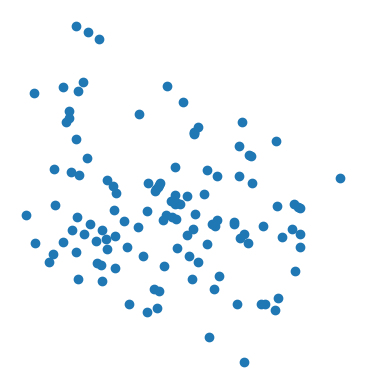

In [63]:
filtered_gdf.plot().set_axis_off()

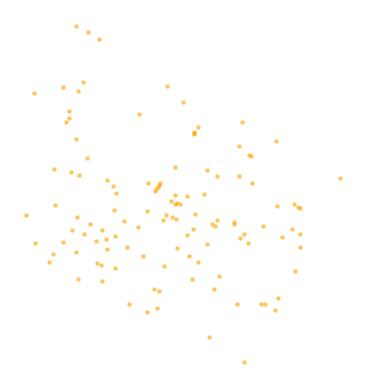

In [66]:
ax = filtered_gdf.plot(marker='o', color='orange', markersize=5, alpha=0.5)
ax.set_axis_off()


In [70]:
pluto_ogrio = ogr.read_dataframe (r"C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

Text(0.5, 1.0, 'NYC MapPLUTO')

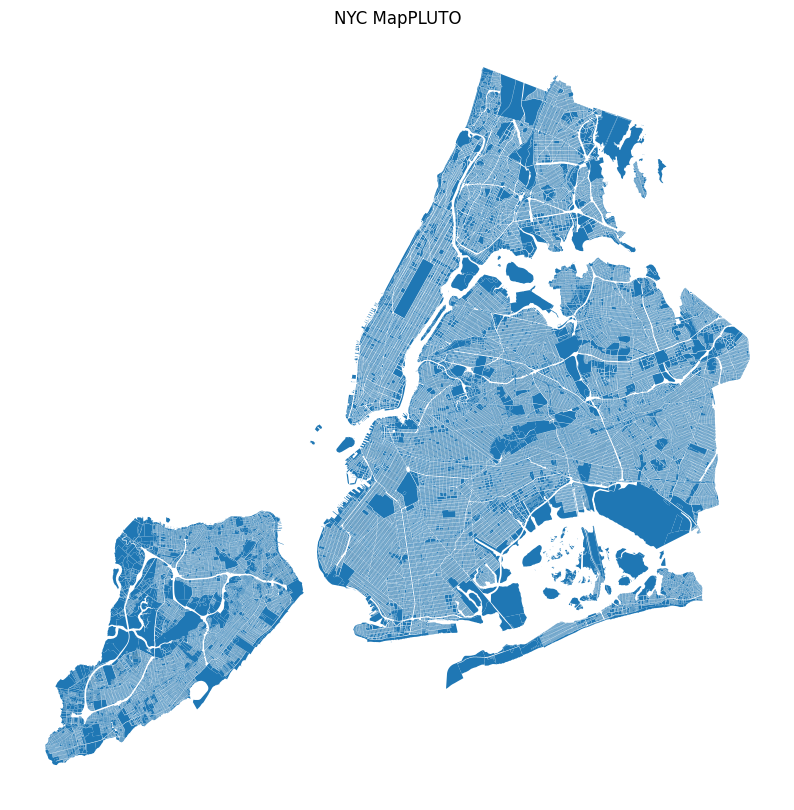

In [71]:
pluto_ogrio.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapPLUTO")

In [72]:
bounding_area_gdf = gpd.read_file('C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/bounding2.geojson')
print(bounding_area_gdf)

                                            geometry
0  POLYGON ((-73.98950 40.78022, -73.99406 40.773...


In [74]:
main_gdf = gpd.read_file('C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/Building Footprints.geojson')
print(main_gdf.head())
print(main_gdf.crs)

: 

: 

                         name    base_bbl shape_area    heightroof  \
12244                    None  1011320020        0.0        207.62   
16636                    None  1011540101        0.0         57.24   
19795                    None  1011180028        0.0         61.52   
23350                    None  1011540160        0.0         90.12   
35666    Lincoln Plaza Towers  1011140061        0.0  279.79294644   
...                       ...         ...        ...           ...   
1046474                  None  1011190001        0.0         144.5   
1067342                  None  1011220060        0.0         53.41   
1077185                  None  1011580133        0.0         668.0   
1077993        Bosch Building  1011130013        0.0        132.91   
1081677                  None  1011130018        0.0         299.0   

         mpluto_bbl cnstrct_yr                                globalid  \
12244    1011320020       1950  {9B7DB22C-B317-44B4-AE01-01D4B4BC20BF}   
16636    10

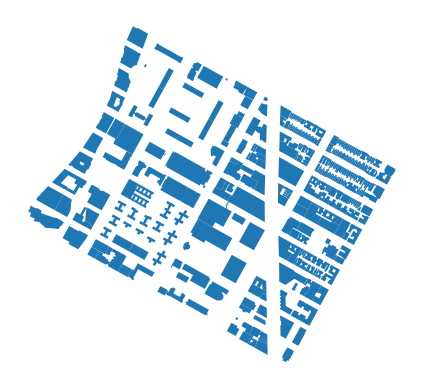

In [ ]:
if main_gdf.crs != bounding_area_gdf.crs:
    bounding_area_gdf = bounding_area_gdf.to_crs(main_gdf.crs)

from shapely.geometry import shape

# Combine the geometries of the bounding area if there are multiple
bounding1_area = bounding_area_gdf.unary_union

# Filter the main GeoDataFrame to include only data within the bounding area
filtered1_gdf = main_gdf[main_gdf.geometry.within(bounding1_area)]

# Check the filtered GeoDataFrame
print(filtered1_gdf)

filtered1_gdf.plot().set_axis_off()

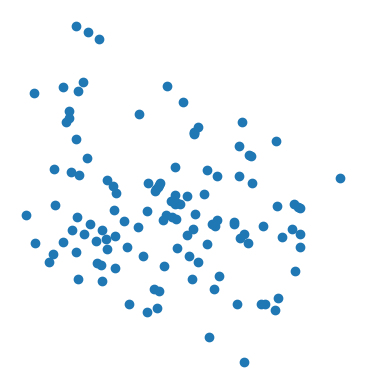

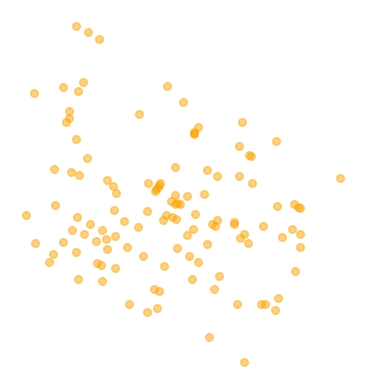

In [ ]:
main_gdf = gpd.read_file('C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Points Of Interest.geojson')

if main_gdf.crs != bounding_area_gdf.crs:
    bounding_area_gdf = bounding_area_gdf.to_crs(main_gdf.crs)

from shapely.geometry import shape

# Combine the geometries of the bounding area if there are multiple
bounding_area = bounding_area_gdf.unary_union

# Filter the main GeoDataFrame to include only data within the bounding area
filtered_gdf = main_gdf[main_gdf.geometry.within(bounding_area)]
filtered_gdf.plot().set_axis_off()
ax = filtered_gdf.plot(marker='o', color='orange', markersize=30, alpha=0.5)
ax.set_axis_off()

C:\Users\cathe\AppData\Local\Temp\ipykernel_27556\2725870060.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


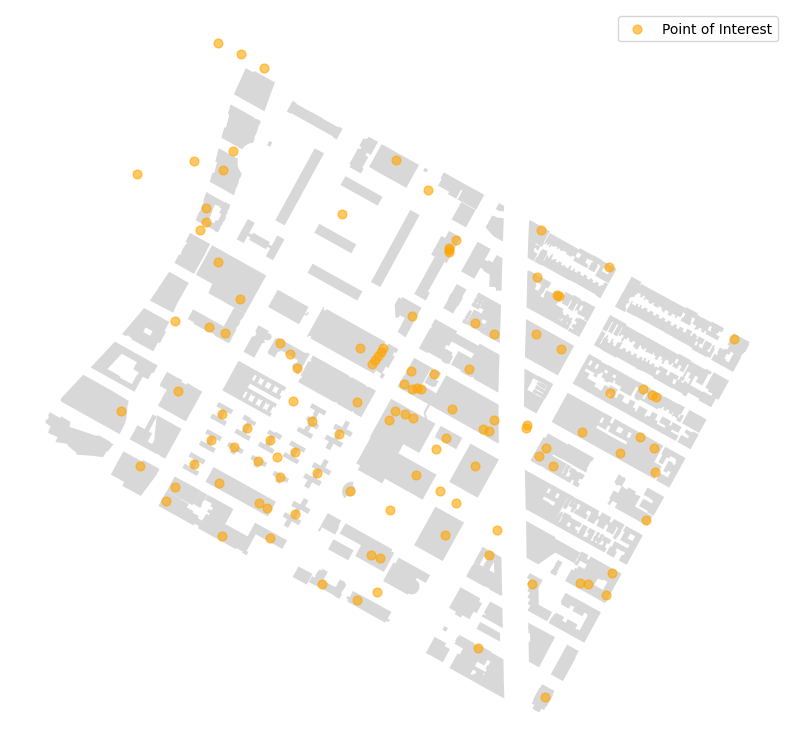

In [ ]:
# Ensure CRS alignment for the second GeoDataFrame
if filtered1_gdf.crs != main_gdf.crs:
    filtered1_gdf = filtered1_gdf.to_crs(main_gdf.crs)

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

filtered1_gdf.plot(ax=ax, marker='^', color='grey', markersize=5, alpha=0.3, label='Filtered1 GDF')
# Plot the first GeoDataFrame
filtered_gdf.plot(ax=ax, marker='o', color='orange', markersize=40, alpha=0.6, label='Point of Interest')

# Plot the second GeoDataFrame

# Add a legend
plt.legend()

# Set axis off for a cleaner look
ax.set_axis_off()

# Save the plot as an image (optional)
plt.savefig('overlayed_plot.png', bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
geojson_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/Points Of Interest.geojson'
gdf = gpd.read_file(geojson_path)

In [ ]:
gdf.columns

Index(['name', 'source', 'complexid', 'saftype', 'pri_add', 'modified',
       'faci_dom', 'facility_t', 'b7_sc', 'placeid', 'bin', 'sos', 'segmentid',
       'borough', 'created', 'geometry'],
      dtype='object')

In [ ]:
gdf.dtypes

name                  object
source                object
complexid             object
saftype               object
pri_add               object
modified      datetime64[ns]
faci_dom              object
facility_t            object
b7_sc                 object
placeid               object
bin                   object
sos                   object
segmentid             object
borough               object
created       datetime64[ns]
geometry            geometry
dtype: object

Index(['name', 'source', 'complexid', 'saftype', 'pri_add', 'modified',
       'faci_dom', 'facility_t', 'b7_sc', 'placeid', 'bin', 'sos', 'segmentid',
       'borough', 'created', 'geometry'],
      dtype='object')
         name source complexid saftype pri_add   modified faci_dom facility_t  \
0     HOLLAND  DoITT         0       N     0.0 2011-11-18        9          6   
1  WHITESTONE  DoITT      3378       N     0.0 2017-01-09        8          6   
2    BROOKLYN  DoITT      3960       N     0.0 2018-01-22        8          6   
3   MANHATTAN  DoITT         0       N     0.0 2011-05-11        8          6   
4     PULASKI  DoITT         0       N     0.0 2017-03-03        8          6   

      b7_sc placeid bin sos segmentid borough    created  \
0  19743001     567   0   1     31895       1 2009-05-14   
1  49731001     568   0   2    306303       4 2009-05-14   
2  39734001     576   0   2    144842       3 2009-05-14   
3  19795001     580   0   1    162664       1 2009-05-14 

ValueError: aspect must be finite and positive 

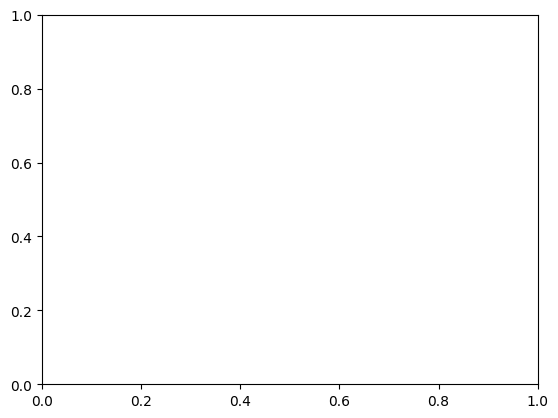

In [ ]:
print(gdf.columns)

# Inspect the first few rows
print(gdf.head())

# Ensure the column name is correctly used in the filtering
column_name = 'facility_t'  # Replace with the correct column name if different

# Filter the GeoDataFrame to include only Residential facilities (FACILITY_T = 1)
residential_gdf = gdf[gdf[column_name] == 1]

# Plot the filtered GeoDataFrame with default parameters first
residential_gdf.plot()

# If the above plot works, proceed with customized plotting
ax = residential_gdf.plot(marker='o', color='blue', markersize=5, alpha=0.5, figsize=(10, 10))
ax.set_title('Residential Facilities')
ax.set_axis_off()

In [ ]:
gdf.fillna({"facility_t": "1"}, inplace=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'fillna'

In [ ]:
gdf.facility_t.value_counts()

facility_t
4     4107
2     3829
1     3061
6     2010
9     1596
5     1518
7     1016
8      916
13     783
11     620
3      588
12     287
10     270
Name: count, dtype: int64

In [ ]:
gdf

,name,source,complexid,saftype,pri_add,modified,faci_dom,facility_t,b7_sc,placeid,bin,sos,segmentid,borough,created,geometry
0,HOLLAND,DoITT,0,N,0.0,2011-11-18,9,6,19743001,567,0,1,31895,1,2009-05-14,POINT (-74.00702 40.72463)
1,WHITESTONE,DoITT,3378,N,0.0,2017-01-09,8,6,49731001,568,0,2,306303,4,2009-05-14,POINT (-73.82662 40.79718)
2,BROOKLYN,DoITT,3960,N,0.0,2018-01-22,8,6,39734001,576,0,2,144842,3,2009-05-14,POINT (-73.99395 40.70385)
3,MANHATTAN,DoITT,0,N,0.0,2011-05-11,8,6,19795001,580,0,1,162664,1,2009-05-14,POINT (-73.99194 40.70960)
4,PULASKI,DoITT,0,N,0.0,2017-03-03,8,6,39740001,582,0,1,157362,3,2009-05-14,POINT (-73.95266 40.73907)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20596,ST SEBASTIANS CATHOLIC ACADEMY,OTHER,6166,G,0.0,NaT,17,2,40126901,1039630,0,2,75364,4,2024-07-16,POINT (-73.90667 40.74599)
20597,ST SEBASTIAN RECTORY,OTHER,6166,X,0.0,NaT,1,9,40126902,1039631,4028253,1,75362,4,2024-07-16,POINT (-73.90676 40.74632)
20598,ST BARTHOLOMEW RC CHURCH,OTHER,6169,G,0.0,NaT,1,9,40129901,1039636,4439249,2,76563,4,2024-07-17,POINT (-73.87689 40.74328)
20599,ADVENTIST JACKSON HGTS CHURCH,OTHER,0,G,0.0,NaT,1,9,40128102,1039632,4030675,1,342516,4,2024-07-17,POINT (-73.89180 40.74316)


In [ ]:


csv_path = 'C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/narrative_data/nyedes_20180214.csv'
nodes = pd.read_csv(csv_path)


In [ ]:
nodes.head()

,the_geom,ENUMBER,CEQR_NUM,ULURP_NUM,BOROCODE,TAXBLOCK,TAXLOT,ZONING_MAP,DESCRIPTIO,BBL
0,POINT (-74.00267760144388 40.7082105152612),E-621,21DCP084M,210438ZSM 210439ZRM 210441ZAM 130053BZSM 21044...,1,98,1,12b,Air Quality - HVAC natural gas with low Nox on...,1000980001
1,POINT (-74.00777660006608 40.71801853768336),E-61,95DCP010M,940309 ZMM,1,179,1,"12a, 12b",Window Wall Attenuation & Alternate Ventilation,1001790001
2,POINT (-74.0061977386453 40.72011774386466),E-257,10DCP039M,100369zmm,1,190,39,12a,Hazardous Materials* Phase I and Phase II Test...,1001900039
3,POINT (-74.00601709384344 40.72006675263147),E-257,10DCP039M,100369zmm,1,190,41,12a,Hazardous Materials* Phase I and Phase II Test...,1001900041
4,POINT (-74.00542028855018 40.719311956891936),E-544,18BSA058M,2017-298-BZ,1,191,8,12a,Hazardous Materials* Phase I and Phase II Test...,1001910008


In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

In [ ]:
# get maximum bounding geometry for all tax lots
bounds = cb_307.total_bounds

In [ ]:
bounds_poly = gpd.GeoSeries(
    Polygon(
        [
            [bounds[0], bounds[1]],
            [bounds[0], bounds[3]],
            [bounds[2], bounds[3]],
            [bounds[2], bounds[1]],
            [bounds[0], bounds[1]],
        ]
    )
)

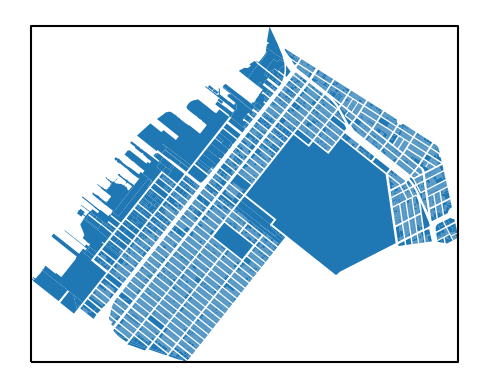

In [ ]:
ax = cb_307.plot()
bounds_poly.boundary.plot(ax=ax, color="black").set_axis_off()

In [ ]:
bounds_poly

0    POLYGON ((975222.902 170552.422, 975222.902 18...
dtype: geometry

In [ ]:
bounds_poly.crs = cb_307.crs

In [ ]:
bounds_poly.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## reproject


In [ ]:
bounds_poly_wgs84 = bounds_poly.to_crs("EPSG:4326")

In [ ]:
cb_307_bldgs = ogr.read_dataframe(
    "C:/Users/cathe/Documents/Github/cdp-mapping-systems/Data/Building Footprints.geojson",
    mask=bounds_poly_wgs84[0],
)

<Axes: >

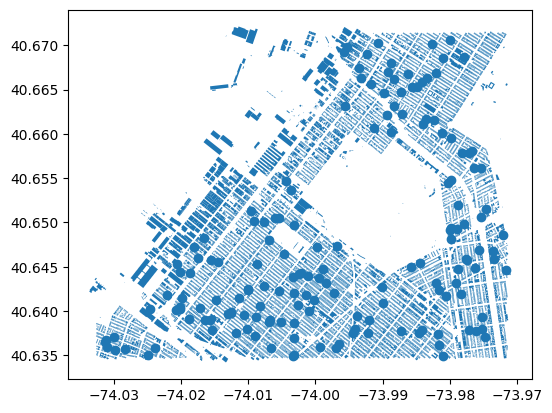

In [ ]:
cb_307_bldgs.plot()

In [ ]:
cb_307_bldgs = cb_307_bldgs[cb_307_bldgs.geometry.type != "Point"]

<Axes: >

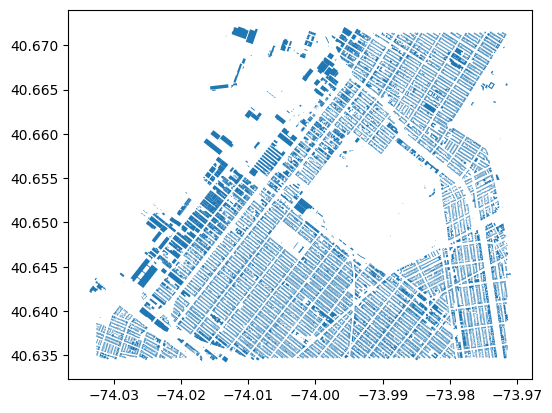

In [ ]:
cb_307_bldgs.plot()

In [ ]:
cb_307_bldgs = cb_307_bldgs.to_crs(cb_307.crs)

## spatial join


In [ ]:
cb_307_bldgs["rep_pt"] = cb_307_bldgs.representative_point()
cb_307_bldgs.set_geometry("rep_pt", inplace=True)

In [ ]:
cb_307_bldgs.base_bbl.nunique(), cb_307_bldgs.shape[0], cb_307_bldgs.globalid.nunique()

(26358, 30110, 30110)

In [ ]:
cb_307_bldgs

,name,base_bbl,shape_area,heightroof,mpluto_bbl,cnstrct_yr,globalid,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,geometry,rep_pt
0,None,3008130054,0.0,31.05,3008130054,1901,{C2B6150A-AA05-4865-B836-9DFA5C153E9C},Constructed,2100,48,Photogramm,3014166,2017-08-22,392052,0.0,"MULTIPOLYGON (((979424.884 174653.762, 979393....",POINT (979402.531 174638.900)
1,None,3010120038,0.0,42.44,3010120038,1921,{65E24ABD-485B-4B01-B70E-5ACA0E221B53},Constructed,2100,115,Photogramm,3022371,2017-08-22,743038,0.0,"MULTIPOLYGON (((989250.122 182249.393, 989226....",POINT (989230.470 182235.219)
2,None,3053130127,0.0,26.38239517,3053130127,1940,{454D03AE-5F41-4886-A5C5-74DD122005EF},Constructed,2100,57,Photogramm,3123939,2017-08-22,785686,0.0,"MULTIPOLYGON (((989342.250 173309.206, 989328....",POINT (989345.270 173325.920)
3,None,3058710090,0.0,24.71,3058710090,1920,{F02017F9-C56E-4793-96D1-03741F2569AC},Constructed,2100,73,Photogramm,3145644,2017-08-22,560761,0.0,"MULTIPOLYGON (((976372.261 170905.430, 976404....",POINT (976382.124 170892.831)
4,None,3058850095,0.0,26.79,3058850095,1925,{D97E7A81-466F-47F7-9159-D52052EC7129},Constructed,2100,68,Photogramm,3146300,2017-08-22,541427,0.0,"MULTIPOLYGON (((975991.817 170852.230, 975985....",POINT (975969.477 170848.875)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30105,None,3055910017,0.0,60.0,3055917508,2008,{F565CBEB-73A0-4C8B-8ACF-D7E26DEDFB03},Constructed,2100,74,Other (Man,3394074,2024-05-29,1100472,0.0,"MULTIPOLYGON (((986063.897 173535.911, 986025....",POINT (986034.911 173520.284)
30106,None,3006390016,0.0,None,3006390016,2021,{019343C0-3AC3-47DE-9C68-0011F8B5B7AD},Constructed,2100,18,Other (Man,3009227,2024-05-03,1294399,0.0,"MULTIPOLYGON (((985148.458 181241.335, 985161....",POINT (985116.244 181187.492)
30107,None,3007280036,0.0,60.0,3007280036,2024,{041C01B4-5A94-46C4-A3BB-0457C706C8BC},Constructed,2100,63,Other (Man,3426350,2024-06-20,1302168,0.0,"MULTIPOLYGON (((981766.623 176163.648, 981761....",POINT (981725.644 176235.773)
30108,None,3010510039,0.0,120.0,3010510039,2023,{0007187C-0E44-4204-AFE4-F9C3FC0C1DA8},Constructed,2100,46,Other (Man,3024085,2024-06-18,1302163,0.0,"MULTIPOLYGON (((986145.791 181865.976, 986188....",POINT (986220.175 181831.511)


In [ ]:
## spatial join buildings to tax lots based on building representative point
bldgs_w_lot = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin(
    cb_307, how="inner", op="within"
)

c:\ProgramData\anaconda3\envs\cdp\Lib\site-packages\IPython\core\interactiveshell.py:3577: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
bldgs_w_lot_nearest = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin_nearest(
    cb_307, how="left", distance_col="distance"
)

<Axes: >

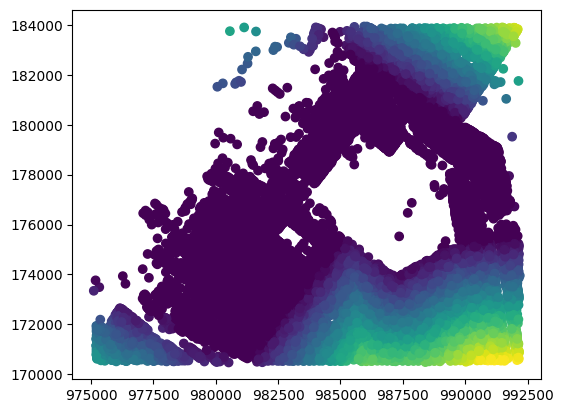

In [ ]:
bldgs_w_lot_nearest.plot("distance")

<Axes: >

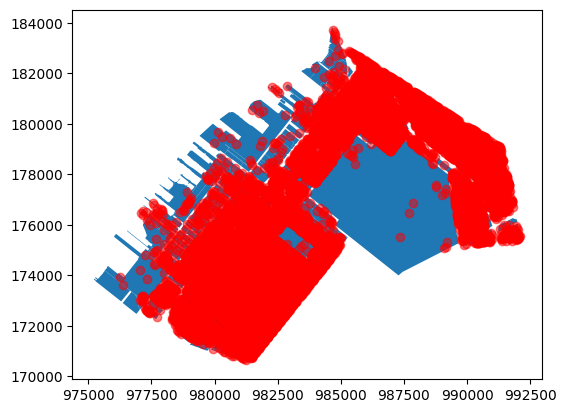

In [ ]:
ax = cb_307.plot()
bldgs_w_lot.plot(ax=ax, color="red", alpha=0.5)

In [ ]:
## drop cases where there is no match (i.e. no tax lot for buildings)

In [ ]:
# now, join back to original building footprints
bldgs_w_lot = bldgs_w_lot.drop(columns=["rep_pt"]).merge(
    cb_307_bldgs, on="globalid", how="left"
)

In [ ]:
bldgs_w_lot_gdf = gpd.GeoDataFrame(bldgs_w_lot, geometry="geometry")

In [ ]:
cmap = {
    "One & Two Family Buildings": "#ff0000",
    "Multi-Family Walk-Up Buildings": "#00ff00",
    "Multi-Family Elevator Buildings": "#0000ff",
    "Mixed Residential & Commercial Buildings": "#ff00ff",
    "Commercial & Office Buildings": "#00ffff",
    "Industrial & Manufacturing": "#ffff00",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#800000",
    "Open Space & Outdoor Recreation": "#008000",
    "Parking Facilities": "#000080",
    "Vacant Land": "#800080",
    "Unknown": "#000000",
}

In [ ]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

In [ ]:
cb_307.LandUse


0        07
1        01
2        01
3        01
4        11
         ..
13279    04
13280    05
13281    05
13282    05
13283    07
Name: LandUse, Length: 13284, dtype: object

In [ ]:
# now we can remap the numbers into something more meaningful

land_use_codes = {
    "01": "One & Two Family Buildings",
    "02": "Multi-Family Walk-Up Buildings",
    "03": "Multi-Family Elevator Buildings",
    "04": "Mixed Residential & Commercial Buildings",
    "05": "Commercial & Office Buildings",
    "06": "Industrial & Manufacturing",
    "07": "Transportation & Utility",
    "08": "Public Facilities & Institutions",
    "09": "Open Space & Outdoor Recreation",
    "10": "Parking Facilities",
    "11": "Vacant Land",
}

In [ ]:
bldgs_w_lot_gdf["LandUse"] = bldgs_w_lot_gdf["LandUse"].map(land_use_codes)

In [ ]:
bldgs_w_lot_gdf["color"] = bldgs_w_lot_gdf["LandUse"].map(cmap)

In [ ]:
bldgs_w_lot_gdf["color"]

0        #ff0000
1        #800000
2        #ffff00
3        #ff00ff
4        #ff0000
          ...   
14310    #0000ff
14311    #00ffff
14312    #800000
14313    #ff00ff
14314    #800080
Name: color, Length: 14315, dtype: object

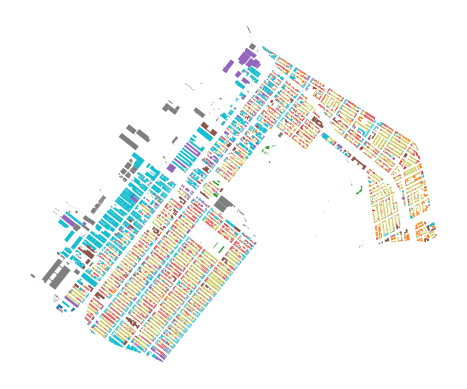

In [ ]:
bldgs_w_lot_gdf.plot(column="color",legend=False).set_axis_off()

In [ ]:
bldgs_w_lot_gdf.fillna({"LandUse": "Unknown"}, inplace=True)

In [ ]:
bldgs_w_lot_gdf.LandUse.unique()

array(['One & Two Family Buildings', 'Public Facilities & Institutions',
       'Industrial & Manufacturing',
       'Mixed Residential & Commercial Buildings',
       'Commercial & Office Buildings', 'Multi-Family Walk-Up Buildings',
       'Transportation & Utility', 'Parking Facilities', 'Unknown',
       'Multi-Family Elevator Buildings', 'Vacant Land',
       'Open Space & Outdoor Recreation'], dtype=object)

In [ ]:
cmap_rgb

{'One & Two Family Buildings': [255, 0, 0],
 'Multi-Family Walk-Up Buildings': [0, 255, 0],
 'Multi-Family Elevator Buildings': [0, 0, 255],
 'Mixed Residential & Commercial Buildings': [255, 0, 255],
 'Commercial & Office Buildings': [0, 255, 255],
 'Industrial & Manufacturing': [255, 255, 0],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [128, 0, 0],
 'Open Space & Outdoor Recreation': [0, 128, 0],
 'Parking Facilities': [0, 0, 128],
 'Vacant Land': [128, 0, 128],
 'Unknown': [0, 0, 0]}

In [ ]:
# make a lonboard plot with color based on land use and height based on number of floors
heights = bldgs_w_lot_gdf["heightroof"].astype(float).to_numpy()
bldgs_layer = PolygonLayer.from_geopandas(
    bldgs_w_lot_gdf[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(bldgs_w_lot_gdf["LandUse"], cmap=cmap_rgb),
    extruded=True,
    get_elevation=heights,
)

m = Map(
    [bldgs_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m


c:\ProgramData\anaconda3\envs\cdp\Lib\site-packages\lonboard\_geoarrow\ops\reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x00000156F1870280>
[
…

## attribute join


... sometimes it makes more sense to join based on attributes rather than spatial relationships. This is one of those cases.


In [ ]:
cb_307_bldgs.mpluto_bbl.nunique(), cb_307.shape

(26321, (13284, 95))

In [ ]:
cb_307.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [ ]:
cb_307_bldgs.mpluto_bbl.dtype, cb_307.BBL.dtype

(dtype('O'), dtype('float64'))

In [ ]:
cb_307_bldgs["mpluto_bbl"] = cb_307_bldgs["mpluto_bbl"].astype(float)

In [ ]:
bldgs_w_lot_attrib = cb_307_bldgs.merge(
    cb_307, left_on="mpluto_bbl", right_on="BBL", how="inner"
)

In [ ]:
# assert bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape
bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape

False

<Axes: >

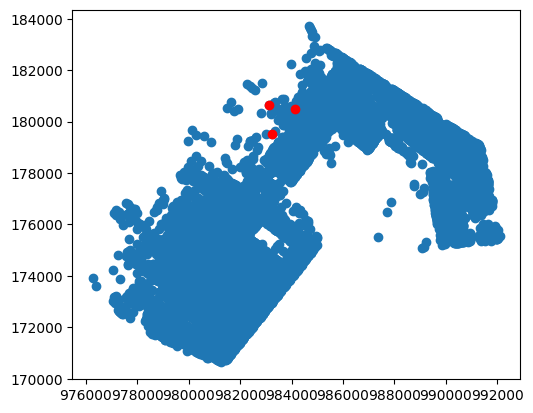

In [ ]:
# find the globalid of the buildings in bldgs_w_lot_attrib that are not in bldgs_w_lot_gdf
ax = bldgs_w_lot_attrib.plot()
bldgs_w_lot_attrib[~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)].plot(
    ax=ax, color="red"
)

In [ ]:
missing_buildings = bldgs_w_lot_attrib[
    ~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)
].globalid.unique()

In [ ]:
bldgs_w_lot_attrib["geometry"] = bldgs_w_lot_attrib["geometry_x"]

In [ ]:
bldgs_w_lot_attrib.set_geometry("geometry", inplace=True)

In [ ]:
cb_307


,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry
0,BK,5322,80,307,3050401,30504012008,504,2007,15,40,...,None,None,24v1.1,None,40.648509,-73.971801,None,0.0,12635.925274,"MULTIPOLYGON (((992037.743 175532.706, 992031...."
1,BK,5322,122,307,3050401,30504012008,504,2007,15,40,...,None,None,24v1.1,None,40.648583,-73.972018,None,0.0,1919.251473,"MULTIPOLYGON (((992030.484 175564.062, 992032...."
2,BK,5322,121,307,3050401,30504012008,504,2007,15,40,...,None,None,24v1.1,None,40.648539,-73.972079,None,0.0,1661.780363,"MULTIPOLYGON (((992026.508 175526.930, 992008...."
3,BK,5322,120,307,3050401,30504012008,504,2007,15,40,...,None,None,24v1.1,None,40.648515,-73.972140,None,0.0,1504.266387,"MULTIPOLYGON (((992008.358 175517.599, 991991...."
4,BK,5322,124,307,3050401,30504012007,504,2004,15,40,...,None,None,24v1.1,None,40.648924,-73.972107,None,0.0,962.335180,"MULTIPOLYGON (((992007.947 175654.106, 992005...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,BK,5785,37,307,3011800,30118003000,118,1000,20,43,...,None,None,24v1.1,None,40.635373,-74.009998,None,0.0,1193.807583,"MULTIPOLYGON (((981504.291 170750.712, 981491...."
13280,BK,5794,30,307,3011800,30118002003,118,2005,20,38,...,None,None,24v1.1,None,40.635172,-74.011057,None,0.0,6863.061971,"MULTIPOLYGON (((981240.608 170707.830, 981185...."
13281,BK,5794,27,307,3011800,30118002003,118,2005,20,38,...,None,None,24v1.1,None,40.635249,-74.011248,None,0.0,6882.281531,"MULTIPOLYGON (((981189.434 170748.428, 981114...."
13282,BK,5794,25,307,3011800,30118002003,118,2005,20,38,...,None,None,24v1.1,None,40.635332,-74.011378,None,0.0,4873.017777,"MULTIPOLYGON (((981067.536 170684.276, 981055...."


### investigate- what's going on??


In [ ]:
cmap_rgb

{'One & Two Family Buildings': [255, 0, 0],
 'Multi-Family Walk-Up Buildings': [0, 255, 0],
 'Multi-Family Elevator Buildings': [0, 0, 255],
 'Mixed Residential & Commercial Buildings': [255, 0, 255],
 'Commercial & Office Buildings': [0, 255, 255],
 'Industrial & Manufacturing': [255, 255, 0],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [128, 0, 0],
 'Open Space & Outdoor Recreation': [0, 128, 0],
 'Parking Facilities': [0, 0, 128],
 'Vacant Land': [128, 0, 128],
 'Unknown': [0, 0, 0]}

In [ ]:
cb_307[["geometry", "LandUse"]]

,geometry,LandUse
0,"MULTIPOLYGON (((992037.743 175532.706, 992031....",07
1,"MULTIPOLYGON (((992030.484 175564.062, 992032....",01
2,"MULTIPOLYGON (((992026.508 175526.930, 992008....",01
3,"MULTIPOLYGON (((992008.358 175517.599, 991991....",01
4,"MULTIPOLYGON (((992007.947 175654.106, 992005....",11
...,...,...
13279,"MULTIPOLYGON (((981504.291 170750.712, 981491....",04
13280,"MULTIPOLYGON (((981240.608 170707.830, 981185....",05
13281,"MULTIPOLYGON (((981189.434 170748.428, 981114....",05
13282,"MULTIPOLYGON (((981067.536 170684.276, 981055....",05


In [ ]:
# make a lonboard plot with color based on land use and height based on number of floors

missing_bldgs = bldgs_w_lot_attrib[bldgs_w_lot_attrib.globalid.isin(missing_buildings)]

heights_missing = missing_bldgs["heightroof"].astype(float).to_numpy()

lots_layer = PolygonLayer.from_geopandas(
    cb_307[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(cb_307["LandUse"], cmap=cmap_rgb),
)

missing_bldgs_layer = PolygonLayer.from_geopandas(
    missing_bldgs[["geometry", "LandUse"]],
    get_fill_color=[255, 0, 0, 155],
    extruded=True,
    get_elevation=heights_missing,
)

m = Map(
    [missing_bldgs_layer, lots_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

KeyError: '07'

So we can see that there are three cases where buildings are associated with lots, even if their representative point (or entire geometry) fall outside of the actual polygon.


## dissolve


Learn more about dissolve here: https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html


In [ ]:
cb_307_by_owner = cb_307.dissolve(
    by="OwnerName",
    aggfunc={
        "LandUse": list,
        "LotArea": "sum",
    },
).reset_index()

Text(0.5, 1.0, 'Top 10 Owners by Lot Area')

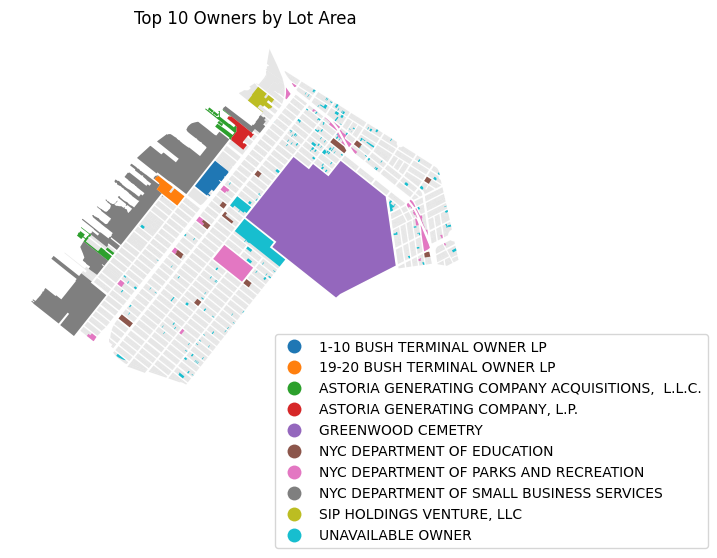

In [ ]:
fig, ax = plt.subplots()
cb_307.plot(color="#cecece", ax=ax, alpha=0.5)

cb_307_by_owner.sort_values("LotArea", ascending=False).head(10).plot(
    column="OwnerName", legend=True, ax=ax
).set_axis_off()


# get legend item
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0, 0.0, 0.5, 0.2))
ax.set_title("Top 10 Owners by Lot Area")
# put legend off the plot
# cb_307_by_owner.plot(column="OwnerName", legend=False)

In [ ]:
cb_307_by_owner

,OwnerName,geometry,LandUse,LotArea
0,*** NO OWNER FOUND ***,"POLYGON ((980590.724 174235.587, 980527.813 17...",[01],2003
1,1-10 BUSH TERMINAL OWNER LP,"POLYGON ((982202.987 178074.791, 982200.638 17...","[05, 06, 06, 05, 06, 10, 06, 05]",722097
2,10 E 4TH STREET LLC,"POLYGON ((990181.201 176930.755, 990282.152 17...",[02],2050
3,10-16 OCEAN REALTIES,"POLYGON ((991792.749 176633.932, 991787.150 17...",[03],42968
4,100 19TH STREET,"POLYGON ((989711.736 177970.244, 989649.158 17...",[02],6010
...,...,...,...,...
12136,"ZWERLING, CARA","POLYGON ((990576.588 178737.293, 990630.331 17...",[01],2000
12137,"ZWICK, ELAINE R","POLYGON ((990085.407 178976.260, 990103.152 17...",[02],2000
12138,ZWL REALTY LLC,"POLYGON ((983015.618 174308.387, 982951.592 17...",[02],2003
12139,ZY MANAGEMENT LLC,"POLYGON ((981487.360 171696.522, 981474.555 17...",[04],2017


## Intersect / Difference


In [ ]:
sample_block = cb_307.Block.sample(1).values[0]

In [ ]:
sample_block

807

In [ ]:
cb_307_bldgs.columns

Index(['name', 'base_bbl', 'shape_area', 'heightroof', 'mpluto_bbl',
       'cnstrct_yr', 'globalid', 'lststatype', 'feat_code', 'groundelev',
       'geomsource', 'bin', 'lstmoddate', 'doitt_id', 'shape_len', 'geometry',
       'rep_pt'],
      dtype='object')

In [ ]:
sample_block_lots = cb_307[cb_307.Block.eq(sample_block)].copy()
sample_block_bldgs = cb_307_bldgs[
    cb_307_bldgs.mpluto_bbl.isin(sample_block_lots.BBL.unique())
].copy()

In [ ]:
sample_block_bldgs.set_geometry("geometry", inplace=True)

Text(0.5, 1.0, 'Block 807')

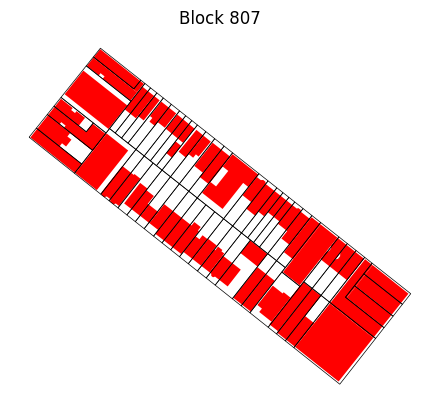

In [ ]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_bldgs.plot(ax=ax, color="red").set_axis_off()

ax.set_title(f"Block {sample_block}")

In [ ]:
sample_block_non_bldg = sample_block_lots.difference(sample_block_bldgs.unary_union)

In [ ]:
sample_block_non_bldg.shape

(58,)

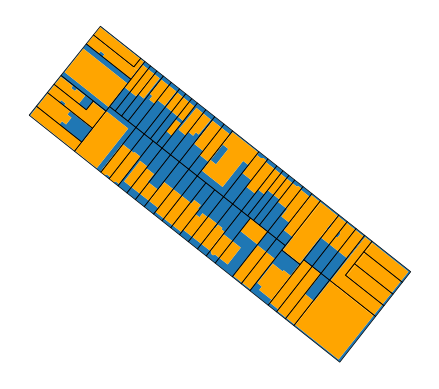

In [ ]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_non_bldg.plot(ax=ax)
sample_block_bldgs.plot(ax=ax, color="orange").set_axis_off()

In [ ]:
sample_block_non_bldg_intersect = sample_block_lots.intersection(
    sample_block_bldgs.unary_union
)

In [ ]:
sample_block_non_bldg_intersect.shape

(58,)

<Axes: >

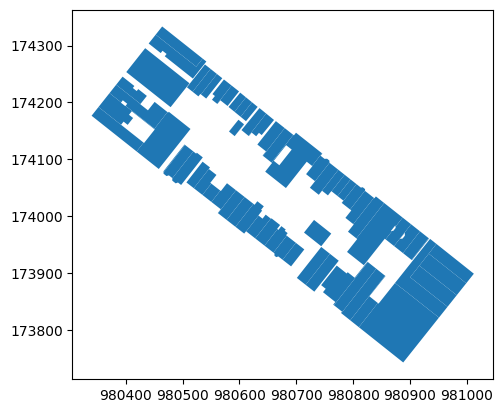

In [ ]:
sample_block_non_bldg_intersect.plot()

## Union


In [ ]:
sample_block_lots["lot_area"] = sample_block_lots.area

In [ ]:
lots_bldgs_union = gpd.overlay(sample_block_lots, sample_block_bldgs, how="union")

C:\Users\cathe\AppData\Local\Temp\ipykernel_32852\3882292701.py:1: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  lots_bldgs_union = gpd.overlay(sample_block_lots, sample_block_bldgs, how="union")


In [ ]:
lots_bldgs_union.shape

(202, 112)

In [ ]:
import pandas as pd

In [ ]:
lots_bldgs_union

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,lststatype,feat_code,groundelev,geomsource,bin,lstmoddate,doitt_id,shape_len,rep_pt,geometry
0,BK,807.0,68.0,307.0,3007600,30076001001,76,1001,15,38.0,...,Constructed,2100,93,Photogramm,3013928,2017-08-22,705097,0.0,POINT (980588.023 174023.184),"POLYGON ((980562.341 174005.370, 980562.029 17..."
1,BK,807.0,68.0,307.0,3007600,30076001001,76,1001,15,38.0,...,Constructed,2100,91,Photogramm,3013930,2017-08-22,201684,0.0,POINT (980551.504 174040.596),"POLYGON ((980566.395 174045.022, 980567.408 17..."
2,BK,807.0,68.0,307.0,3007600,30076001001,76,1001,15,38.0,...,Constructed,2100,93,Photogramm,3013929,2017-08-22,522315,0.0,POINT (980572.004 174034.259),"POLYGON ((980567.229 174012.278, 980551.842 17..."
3,BK,807.0,5.0,307.0,3007600,30076001001,76,1001,15,38.0,...,Constructed,2100,78,Photogramm,3013885,2017-08-22,234599,0.0,POINT (980405.961 174221.636),"POLYGON ((980383.306 174231.212, 980394.562 17..."
4,BK,807.0,1.0,307.0,3007600,30076001001,76,1001,15,38.0,...,Constructed,2100,81,Photogramm,3013882,2017-08-22,625682,0.0,POINT (980384.866 174153.777),"POLYGON ((980431.434 174129.422, 980419.268 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,102,Photogramm,3013911,2017-08-22,323485,0.0,POINT (980878.548 173972.493),"MULTIPOLYGON (((980868.570 173974.121, 980868...."
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,89,Photogramm,3013933,2017-08-22,167151,0.0,POINT (980508.865 174085.258),"MULTIPOLYGON (((980519.051 174113.850, 980482...."
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,2100,88,Photogramm,3013934,2017-08-22,138746,0.0,POINT (980492.777 174096.582),"POLYGON ((980471.356 174070.479, 980466.592 17..."
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Constructed,5110,89,Photogramm,3395832,2017-08-17,1194690,0.0,POINT (980594.974 174155.236),"MULTIPOLYGON (((980608.024 174161.756, 980608...."


<Axes: >

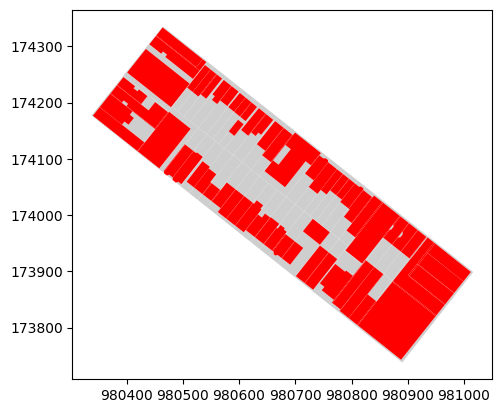

In [ ]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot(color="#cecece")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot(ax=ax, color="red")

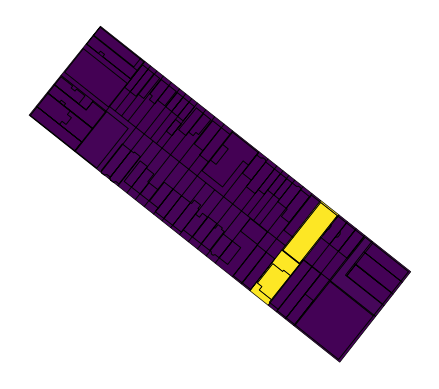

In [ ]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot("Lot")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot("Lot", ax=ax)
lots_bldgs_union.boundary.plot(color="black", ax=ax, linewidth=0.5).set_axis_off()

In [ ]:
lots_bldgs_union.globalid.unique()

array(['{2F914B0D-C239-4407-9570-E5698C9A2B87}',
       '{CC0AF618-5419-4AC2-BCDB-4492E98C9D79}',
       '{8FF3D217-1355-4280-AA8B-D65B1308E18D}',
       '{CA7F5399-E240-4614-8780-3AB6B1BB9BFB}',
       '{34E5CA77-E242-4E44-B13B-D65E30CCF887}',
       '{70AFA235-B24A-4121-8BB5-92177EEA452B}',
       '{32666A2C-DA22-4376-9B67-65C11D13E9D4}',
       '{E1CF09C0-4C88-4DD5-8FEA-0554C70F81A0}',
       '{E9E6582C-5F0A-4AA7-B5D1-F97482FAAFA9}',
       '{AE336C91-F7B6-47B9-A0F0-EF50988E0593}',
       '{052F0794-0B32-45D0-99CC-D16EAFD862FA}',
       '{F8ED8ACC-471D-4CEB-911A-D53F2A361A02}',
       '{8D01EDE0-297C-446F-B2AB-6F566B4481DA}',
       '{53B804BC-3FCB-4066-8D8C-671D45015811}',
       '{2718BD58-3BCF-4D8C-A7B0-AF04C7A26F54}',
       '{ECE10DD6-D9AF-4022-A603-BC95B343BC1B}',
       '{853881C8-64BE-48A8-B72E-16C0857A1BB8}',
       '{F70BA19B-EB2E-4A78-8F05-A0DEB8E62FE8}',
       '{73F0DA7C-C9BF-40A5-A713-DCD9777DADD2}',
       '{1FFF9049-8E9D-45C5-9BB7-B87F4C1BC383}',
       '{33CEB555-EE

In [ ]:
lots_bldgs_union["pct_bldg_lot_coverage"] = lots_bldgs_union.apply(
    lambda x: ((x.geometry.area / x.lot_area) * 100 if type(x.globalid) == str else -1),
    axis=1,
)

<Axes: >

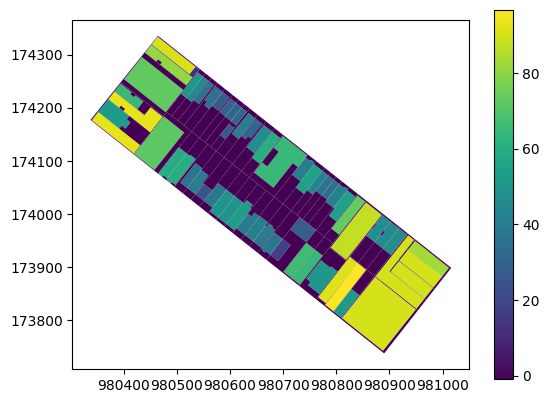

In [ ]:
lots_bldgs_union.plot("pct_bldg_lot_coverage", legend=True)

## calculate soft sites (create new attributes)


In [ ]:
def is_soft_site(r, threshold=0.33):
    if (
        r.BuiltFAR <= r.ResidFAR * threshold
        and r.LotArea > 10000
        and r.LandUse != "Open Space & Outdoor Recreation"
        and r.ResidFAR > 0
    ):
        return 1
    else:
        return 0

In [ ]:
cb_307["soft_site"] = cb_307.apply(is_soft_site, axis=1)

In [ ]:
cb_307["soft_site"].value_counts()

soft_site
0    13246
1       38
Name: count, dtype: int64

<Axes: >

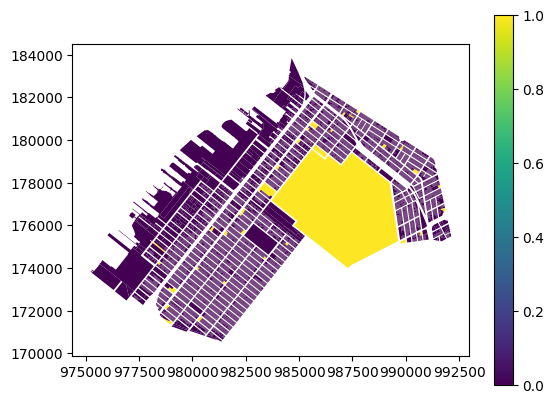

In [ ]:
cb_307.plot("soft_site", legend=True)

In [ ]:
cb_307[cb_307.soft_site.eq(1)][["soft_site", "BuiltFAR", "ResidFAR"]]

,soft_site,BuiltFAR,ResidFAR
116,1,0.05,1.25
125,1,0.69,2.43
529,1,0.18,4.00
538,1,0.59,3.00
796,1,0.41,1.35
1642,1,0.97,6.02
1656,1,0.09,2.00
1696,1,0.00,6.02
1738,1,0.40,2.00
1905,1,0.32,2.00
